# Project of the coupled NT oscillators.

In [ ]:
] status

In [2]:
using Plots
using DifferentialEquations
using Interact

HTML{String}("<script>\n// Immediately-invoked-function-expression to avoid global variables.\n(function() {\n    var warning_div = document.getElementById(\"webio-warning-210006469493336186\");\n    var hide = function () {\n        var script = document.getElementById(\"webio-setup-18056062509596750987\");\n        var parent = script && script.parentElement;\n        var grandparent = parent && parent.parentElement;\n        if (grandparent) {\n            grandparent.style.display = \"none\";\n        }\n        warning_div.style.display = \"none\";\n    };\n    if (typeof Jupyter !== \"undefined\") {\n        console.log(\"WebIO detected Jupyter notebook environment.\");\n        // Jupyter notebook.\n        var extensions = (\n            Jupyter\n            && Jupyter.notebook.config.data\n            && Jupyter.notebook.config.data.load_extensions\n        );\n        if (extensions && extensions[\"webio-jupyter-notebook\"]) {\n            // Extension already loaded.\n            console.log(\"Jupyter WebIO nbextension detected; not loading ad-hoc.\");\n            hide();\n            return;\n        }\n    } else if (window.location.pathname.includes(\"/lab\")) {\n        // Guessing JupyterLa\n        console.log(\"Jupyter Lab detected; make sure the @webio/jupyter-lab-provider labextension is installed.\");\n        hide();\n        return;\n    }\n})();\n\n</script>\n<p\n    id=\"webio-warning-210006469493336186\"\n    class=\"output_text output_stderr\"\n    style=\"padding: 1em; font-weight: bold;\"\n>\n    Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n    For troubleshooting, please see <a href=\"https://juliagizmos.github.io/WebIO.jl/latest/providers/ijulia/\">\n    the WebIO/IJulia documentation</a>.\n    <!-- TODO: link to installation docs. -->\n</p>\n")

In [2]:
function Heav(x)
    if x>0
        return 1
    elseif x<0
        return 0
    else
        return 0.5
    end
end

function Coupled_NT(du,u,p,t)
    
    P1,M1,P2,M2 = u
    
    φ1,φ2,kD,kf,eps,kL1,kL2,α1,α2,LD_phase = p

    h(x) = x./(0.1+x+2*x.^2)
    g(x) = 1/(1+x.^4)
    f(t) = Heav(sin(π*(t+LD_phase)/12))
    
    du[1] = φ1*(M1 - kD*P1 - kf*h(P1) -
            kL1*P1.*f(t))
    
    du[2] = φ1*eps*(g(P1) - M1 +
            (α2*M2).*g(P1))
    
    du[3] = φ2*(M2 - kD*P2 - kf*h(P2) -
            kL2*P2.*f(t))
    
    du[4] = φ2*eps*(g(P2) - M2 +
            (α1*M1).*g(P2))
end

function Coupled_NT_light(du,u,p,t)
    
    P1,M1,P2,M2 = u
    
    φ1,φ2,kD,kf,eps,kL1,kL2,α1,α2,LD_phase = p

    h(x) = x./(0.1+x+2*x.^2)
    g(x) = 1/(1+x.^4)
#     f(t) = Heav(sin(π*t/12))
#     f(t) = Heav1(sin(t))
    
    du[1] = φ1*(M1 - kD*P1 - kf*h(P1) -
            kL1*P1)
    
    du[2] = φ1*eps*(g(P1) - M1 +
            (α2*M2).*g(P1))
    
    du[3] = φ2*(M2 - kD*P2 - kf*h(P2) -
            kL2*P2)
    
    du[4] = φ2*eps*(g(P2) - M2 +
            (α1*M1).*g(P2))
end

function Coupled_NT_noM1(du,u,p,t)
    
    P1,M1,P2,M2 = u
    
    φ1,φ2,kD,kf,eps,kL1,kL2,α1,α2,LD_phase = p

    h(x) = x./(0.1+x+2*x.^2)
    g(x) = 1/(1+x.^4)
    f(t) = Heav(sin(π*(t+LD_phase)/12))
#     f(t) = Heav1(sin(t))
    
    du[1] = φ1*(M1 - kD*P1 - kf*h(P1) -
            kL1*P1.*f(t))
    
    du[2] = φ1*eps*(g(P1) - M1 +
            (α2*M2).*g(P1))
    
    du[3] = φ2*(M2 - kD*P2 - kf*h(P2) -
            kL2*P2.*f(t))
    
    du[4] = φ2*eps*(g(P2) - M2 +
            (α1).*g(P2))
end

Coupled_NT_noM1 (generic function with 1 method)

#An example of manipulate plot.

using DynamicalSystems
@manipulate for px=0:0.01:.3, py=0:0.01:.3,
                plane = Dict("x=0" => 1, "y=0" => 2)
    psos = poincaresos(
    Systems.henonheiles(),
    (plane,0),10000;
    u0 = [0.,0.,px,py])
    
    vbox(vskip(1em),
    md"Poincare surface",
    vskip(1em),
    scatter(psos[:,[2,1][plane]], psos[:,[4,3][plane]],
            linewidth=0.1, markersize=2, markerstrokewidth=0,
            xlimit=[-1/3,1/3], ylimit=[-1/3,1/3],
            markercolor="#F35700"))
end

## Nullclines

In [3]:
φ2 = 2.1
kD = 0.05
eps = 0.05
kf = 1
α1 = 2

P = range(0,stop=5,length=100)
M = range(0,stop=1,length=100)

# pp = repeat(reshape(P, 1, :), length(M), 1)
# mm = repeat(M, 1, length(P))

h(x) = @. x/(0.1+x+2*x^2)
g(x) = @. 1.0/(1.0+x^4)

# N_P2 = @. φ2*(mm - kD*pp - kf*h(pp))
# N_M2min = @. φ2*eps*(g(pp) - mm + (α1*0.1)*g(pp))
# N_M2max = @. φ2*eps*(g(pp) - mm + (α1*0.8)*g(pp))

# fig = quiver()
@manipulate for light_switch = 0:1, M1_value = 0.1:0.1:0.8,
                plane = Dict("O1_space" => 1, "O2_space" => 2)
        # Nullcline
    if (plane==1)
        plot(P,kD*P .+ kf*h(P) .+ 0.05*light_switch*P,linewidth=2,label="P-nullcline")
        plot!(P,g(P) .+ (α1).*g(P),linewidth=2,label="M_nullcline")
    else
        plot(P,kD*P .+ kf*h(P),linewidth=2,label="P-nullcline")
        plot!(P,g(P) .+ (α1*0.1).*g(P),linewidth=2,linestyle=:dot,label="M_min_nullcline")
        plot!(P,g(P) .+ (α1*0.8).*g(P),linewidth=2,linestyle=:dot,label="M_max_nullcline")
        plot!(P,g(P) .+ (α1*M1_value).*g(P),linewidth=2,label="Mv_nullcline")
    end
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{DOM}(DOM(:html, :div), Any[Scope(Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :label), Any["light_switch"], Dict{Symbol,Any}(:className=>"interact ",:style=>Dict{Any,Any}(:padding=>"5px 10px 0px 10px")))], Dict{Symbol,Any}(:className=>"interact-flex-row-left")), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :input), Any[], Dict{Symbol,Any}(:max=>1,:min=>0,:attributes=>Dict{Any,Any}(:type=>"range",Symbol("data-bind")=>"numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}","orient"=>"horizontal"),:step=>1,:className=>"slider slider is-fullwidth",:style=>Dict{Any,Any}()))], Dict{Symbol,Any}(:className=>"interact-flex-row-center")), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes=>Dict("data-bind"=>"text: formatted_val")))], Dict{Symbol,Any}(:className=>"interact-flex-row-right"))], Dict{Symbol,Any}(:className=>"interact-flex-row interact-widget")), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes"=>(Observable{Int64} with 1 listeners. Value:
0, nothing),"index"=>(Observable{Int64} with 2 listeners. Value:
0, nothing)), Set(String[]), nothing, Asset[Asset("js", "knockout", "C:\\Users\\liaog\\.julia\\packages\\Knockout\\IP1uR\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\liaog\\.julia\\packages\\Knockout\\IP1uR\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\liaog\\.julia\\packages\\InteractBase\\9mFwe\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\liaog\\.julia\\packages\\InteractBase\\9mFwe\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\liaog\\.julia\\packages\\Interact\\SbgIk\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any,Any}("changes"=>Any[JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")],"index"=>Any[JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), ConnectionPool(Channel{Any}(sz_max:32,sz_curr:0), Set(AbstractConnection[]), Condition(Any[Task (runnable) @0x000000003d022290])), WebIO.JSString[JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"0\",\"1\"],\"changes\":WebIO.getval({\"name\":\"changes\",\"scope\":\"6477538009006665181\",\"id\":\"ob_02\",\"type\":\"observable\"}),\"index\":WebIO.getval({\"name\":\"index\",\"scope\":\"6477538009006665181\",\"id\":\"ob_01\",\"type\":\"observable\"})};\n    var self = this;\n    function AppViewModel() {\n        for (var key in json_data) {\n            var el = json_data[key];\n            this[key] = Array.isArray(el) ? ko.observableArray(el) : ko.ob

## Direct simulation

### O2 trajectories starting on *poincare* section

In [27]:
u0 = [4,0.8,1.7199,0.128953]
pars= [2.1,2.1,0.05,1.0,0.05,0.05,0.0,2.0,0.0,0.0]    # φ1,φ2,kD,kf,eps,kL1,kL2,α1,α2,LD_phase
tspan = (0.0,480.0)
prob_CNT = ODEProblem(Coupled_NT,u0,tspan,pars)

sol = solve(prob_CNT,Rodas5(),dtmax=0.1);


@manipulate for t = 0:1:480
        # Nullcline
        plot(P,kD*P .+ kf*h(P),linewidth=2,label="P-nullcline")
        plot!(P,g(P) .+ (α1*0.05).*g(P),linewidth=2,linestyle=:dot,label="M_min_nullcline")
        plot!(P,g(P) .+ (α1*0.8).*g(P),linewidth=2,linestyle=:dot,label="M_max_nullcline")
#         t_range = range(0,stop=floor(t/0.1)+1,length=100)
        t_end = floor(Int,t/0.1+1)
        plot!(P,g(P) .+ (α1*sol(t)[2]).*g(P),linewidth=2,label="Mv_nullcline")
        plot!(sol[3,1:t_end],sol[4,1:t_end],linewidth=2)
        scatter!((sol[3,t_end],sol[4,t_end]),markersize=6)
        Plots.vline!([1.72])
    end


# quiver!(pp,mm,quiver=(F1,F2min))

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{DOM}(DOM(:html, :div), Any[Scope(Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :label), Any["t"], Dict{Symbol,Any}(:className=>"interact ",:style=>Dict{Any,Any}(:padding=>"5px 10px 0px 10px")))], Dict{Symbol,Any}(:className=>"interact-flex-row-left")), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :input), Any[], Dict{Symbol,Any}(:max=>481,:min=>1,:attributes=>Dict{Any,Any}(:type=>"range",Symbol("data-bind")=>"numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}","orient"=>"horizontal"),:step=>1,:className=>"slider slider is-fullwidth",:style=>Dict{Any,Any}()))], Dict{Symbol,Any}(:className=>"interact-flex-row-center")), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes=>Dict("data-bind"=>"text: formatted_val")))], Dict{Symbol,Any}(:className=>"interact-flex-row-right"))], Dict{Symbol,Any}(:className=>"interact-flex-row interact-widget")), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes"=>(Observable{Int64} with 1 listeners. Value:
0, nothing),"index"=>(Observable{Any} with 2 listeners. Value:
241, nothing)), Set(String[]), nothing, Asset[Asset("js", "knockout", "C:\\Users\\liaog\\.julia\\packages\\Knockout\\IP1uR\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\liaog\\.julia\\packages\\Knockout\\IP1uR\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\liaog\\.julia\\packages\\InteractBase\\9mFwe\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\liaog\\.julia\\packages\\InteractBase\\9mFwe\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\liaog\\.julia\\packages\\Interact\\SbgIk\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any,Any}("changes"=>Any[JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")],"index"=>Any[JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), ConnectionPool(Channel{Any}(sz_max:32,sz_curr:0), Set(AbstractConnection[]), Condition(Any[Task (runnable) @0x000000003ab2d150])), WebIO.JSString[JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"0\",\"1\",\"2\",\"3\",\"4\",\"5\",\"6\",\"7\",\"8\",\"9\",\"10\",\"11\",\"12\",\"13\",\"14\",\"15\",\"16\",\"17\",\"18\",\"19\",\"20\",\"21\",\"22\",\"23\",\"24\",\"25\",\"26\",\"27\",\"28\",\"29\",\"30\",\"31\",\"32\",\"33\",\"34\",\"35\",\"36\",\"37\",\"38\",\"39\",\"40\",\"41\",\"42\",\"43\",\"44\",\"45\",\"46\",\"47\",\"48\",\"49\",\"50\",\"51\",\"52\",\"53\",\"54\",\"55\",\"56\",\"57\",\"58\",\"59\",\"60\",\"61\",\"62\",\"63\",\"64\",\"65\",\"66\",\"67\",\"68\"

### Trajectories of the full system

In [28]:
u0 = [4,0.8,1.7199,0.128953]
pars= [2.1,2.1,0.05,1.0,0.05,0.05,0.0,2.0,0.0,0.0]    # φ1,φ2,kD,kf,eps,kL1,kL2,α1,α2,LD_phase
tspan = (0.0,480.0)
prob_CNT = ODEProblem(Coupled_NT,u0,tspan,pars)

sol = solve(prob_CNT,Rodas5(),dtmax=0.1);

# Skip transient
# u0 = sol.u[end]
# tspan = (0.0,24.0)
# prob_CNT = ODEProblem(Coupled_NT,u0,tspan,pars)

# sol = solve(prob_CNT,Rodas5(),dtmax=0.1);

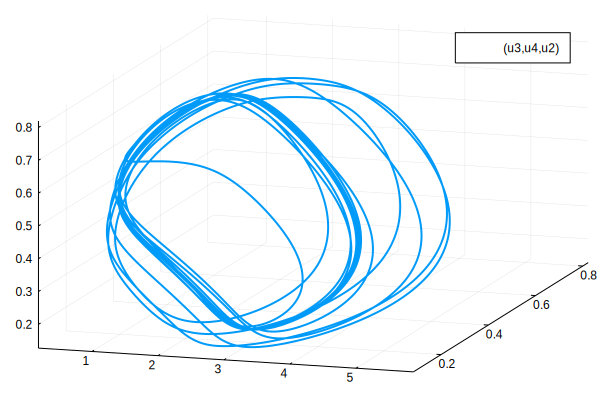

In [29]:
using Plots

#sol[:,5] = mod(sol[:,5],2*pi)
# plot(sol,vars=(1,2),linewidth=2,label = "O1")
# plot!(sol,vars=(3,4),linewidth=2,xaxis="P",yaxis="M",label = "O2",xlims=(0,6),ylims=(0,1))
plot(sol,vars=(3,4,2),linewidth=2,camera=(25,45))

In [30]:
# The iterates of the map.
x = sol[1,:]
y = sol[2,:]
x1 = sol[3,:]
y1 = sol[4,:]

ii = widget(1:length(x),label="")

fig = plot()
@manipulate for i=1:1:length(x)-1 
#                 plane = Dict("O1"=> 1, "O2" => 2)
    fig = scatter([(x[1:i],y[1:i]),(x1[1:i],y1[1:i])],markersize=2)
    scatter!(fig,[(x[i],y[i]),(x1[i],y1[i])],xlims=(0,6),ylims=(0,1),markersize=10)
    end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{DOM}(DOM(:html, :div), Any[Scope(Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :label), Any["i"], Dict{Symbol,Any}(:className=>"interact ",:style=>Dict{Any,Any}(:padding=>"5px 10px 0px 10px")))], Dict{Symbol,Any}(:className=>"interact-flex-row-left")), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :input), Any[], Dict{Symbol,Any}(:max=>4802,:min=>1,:attributes=>Dict{Any,Any}(:type=>"range",Symbol("data-bind")=>"numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}","orient"=>"horizontal"),:step=>1,:className=>"slider slider is-fullwidth",:style=>Dict{Any,Any}()))], Dict{Symbol,Any}(:className=>"interact-flex-row-center")), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes=>Dict("data-bind"=>"text: formatted_val")))], Dict{Symbol,Any}(:className=>"interact-flex-row-right"))], Dict{Symbol,Any}(:className=>"interact-flex-row interact-widget")), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes"=>(Observable{Int64} with 1 listeners. Value:
0, nothing),"index"=>(Observable{Any} with 2 listeners. Value:
2401, nothing)), Set(String[]), nothing, Asset[Asset("js", "knockout", "C:\\Users\\liaog\\.julia\\packages\\Knockout\\IP1uR\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\liaog\\.julia\\packages\\Knockout\\IP1uR\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\liaog\\.julia\\packages\\InteractBase\\9mFwe\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\liaog\\.julia\\packages\\InteractBase\\9mFwe\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\liaog\\.julia\\packages\\Interact\\SbgIk\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any,Any}("changes"=>Any[JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")],"index"=>Any[JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), ConnectionPool(Channel{Any}(sz_max:32,sz_curr:0), Set(AbstractConnection[]), Condition(Any[Task (runnable) @0x0000000012ae05d0])), WebIO.JSString[JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"1\",\"2\",\"3\",\"4\",\"5\",\"6\",\"7\",\"8\",\"9\",\"10\",\"11\",\"12\",\"13\",\"14\",\"15\",\"16\",\"17\",\"18\",\"19\",\"20\",\"21\",\"22\",\"23\",\"24\",\"25\",\"26\",\"27\",\"28\",\"29\",\"30\",\"31\",\"32\",\"33\",\"34\",\"35\",\"36\",\"37\",\"38\",\"39\",\"40\",\"41\",\"42\",\"43\",\"44\",\"45\",\"46\",\"47\",\"48\",\"49\",\"50\",\"51\",\"52\",\"53\",\"54\",\"55\",\"56\",\"57\",\"58\",\"59\",\"60\",\"61\",\"62\",\"63\",\"64\",\"65\",\"66\",\"67\",\"68\",\"6

## Solve with the defined the section

In [33]:
function condition(u,t,integrator)
    u[3] - 1.72
end
function affect!(integrator)
#     integrator.u[3] = pi
    push!(tt, integrator.t)    # save the event time
end

cevent = ContinuousCallback(condition,nothing,affect!,save_positions=(true,false))  # Downcrossing

ContinuousCallback{typeof(condition),Nothing,typeof(affect!),typeof(DiffEqBase.INITIALIZE_DEFAULT),Float64,Int64,Nothing}(condition, nothing, affect!, DiffEqBase.INITIALIZE_DEFAULT, nothing, true, 10, Bool[true, false], 2.220446049250313e-15, 0)

In [39]:
tspan = (0.0,1000.0)

# compute DD
u0= [1,0.8,1.7199,0.128953]
pars= [2.1,2.1,0.05,1.0,0.05,0.0,0.0,2.0,0.0,0.0]    #φ1,φ2,kD,kf,eps,kL1,kL2,α1,α2,LD_phase = p
prob_CNT = ODEProblem(Coupled_NT,u0,tspan,pars)
tt = Float64[]
sol_DD = solve(prob_CNT,Rodas5(),dtmax=0.1,callback=cevent,reltol=1e-8,abstol=1e-8)
tt_DD = tt

# compute LL
u0= [1,0.8,1.7199,0.128953]
pars= [2.1,2.1,0.05,1.0,0.05,0.05,0.0,2.0,0.0,0.0]    #φ1,φ2,kD,kf,eps,kL1,kL2,α1,α2,LD_phase = p
prob_CNT = ODEProblem(Coupled_NT_light,u0,tspan,pars)
tt = Float64[]
sol_LL = solve(prob_CNT,Rodas5(),dtmax=0.1,callback=cevent,reltol=1e-8,abstol=1e-8)
tt_LL = tt

# compute LD
u0= [1,0.8,1.7199,0.128953]
pars= [2.1,2.1,0.05,1.0,0.05,0.05,0.0,2.0,0.0,0.0]    #φ1,φ2,kD,kf,eps,kL1,kL2,α1,α2,LD_phase = p
prob_CNT = ODEProblem(Coupled_NT,u0,tspan,pars)
tt = Float64[]
sol_LD = solve(prob_CNT,Rodas5(),dtmax=0.1,callback=cevent,save_everystep = true, rootfind = true, reltol=1e-8,abstol=1e-8)
tt_LD = tt;

# compute with M1_min
u0= [1,0.8,1.7199,0.128953]
pars= [2.1,2.1,0.05,1.0,0.05,0.05,0.0,0.2,0.0,0.0]    #φ1,φ2,kD,kf,eps,kL1,kL2,α1,α2,LD_phase = p
prob_CNT = ODEProblem(Coupled_NT_noM1,u0,tspan,pars)
tt = Float64[]
sol_M1min = solve(prob_CNT,Rodas5(),dtmax=0.1,callback=cevent,reltol=1e-8,abstol=1e-8)
tt_M1min = tt

# compute with M1_max
u0= [1,0.8,1.7199,0.128953]
pars= [2.1,2.1,0.05,1.0,0.05,0.05,0.0,0.8,0.0,0.0]    #φ1,φ2,kD,kf,eps,kL1,kL2,α1,α2,LD_phase = p
prob_CNT = ODEProblem(Coupled_NT_noM1,u0,tspan,pars)
tt = Float64[]
sol_M1max = solve(prob_CNT,Rodas5(),dtmax=0.1,callback=cevent,reltol=1e-8,abstol=1e-8)
tt_M1max = tt;

In [44]:
# sol_M1min(tt_M1min);
sol_LD[3,:]
# tt_DD[end]
# sol_DD(tt_DD[end-1])
# tt_DD[end-1]:tt_DD[end]
# plot(sol_LD,vars=(3,4))
# findall(x->x==1.72,sol_LD[3,:])

11046-element Array{Float64,1}:
 1.7199            
 1.7189656534568492
 1.71856048622273  
 1.7145083781594765
 1.7039349091016036
 1.6897073341160163
 1.6723461499848027
 1.6510810847205062
 1.6256819188569815
 1.5945780453458656
 1.556829629384117 
 1.5191063267010279
 1.4813967018246013
 ⋮                 
 0.8587105991656009
 0.9076719476799149
 0.9600837085495777
 1.0156263509902217
 1.0739506651272306
 1.1346923557708775
 1.1974859573299785
 1.261976580731341 
 1.3278286717779568
 1.3947316430292438
 1.4624027411447884
 1.4670967722676622

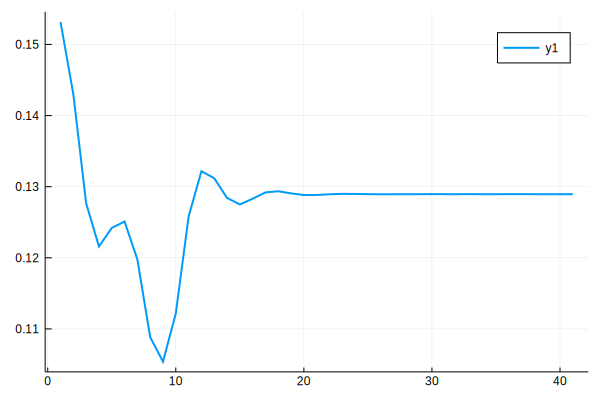

In [21]:
plot(sol_LD(tt)[4,:],linewidth=2)
# scatter(sol(tt).t)

## Plot the limit cycle, show the trajector is bounded by LL and DD limit cycle.

In [40]:
t_range = range(tt_DD[end-1],stop=tt_DD[end]+1,length=100)
findmin(sol_DD(t_range)[4,:])

(0.10308639059644653, 96)

In [172]:
@manipulate for ic=1:0.5:24
    plot(1)
    t_range = range(tt_DD[end-1],stop=tt_DD[end]+1,length=100)
    plot(sol_DD(t_range)[3,:],sol_DD(t_range)[4,:],linewidth=2,label="DD_limitcycle")

    t_range = range(tt_LL[end-1],stop=tt_LL[end]+1,length=100)
    plot!(sol_LL(t_range)[3,:],sol_LL(t_range)[4,:],linewidth=2,label="LL_limicycle")
    
    t_range = range(tt_LD[end-1],stop=tt_LD[end]+1,length=100)
    plot!(sol_LD(t_range)[3,:],sol_LD(t_range)[4,:],linewidth=2,label="LD_limicycle")
    
    t_range = range(tt_M1min[end-1],stop=tt_M1min[end]+1,length=100)
    plot!(sol_M1min(t_range)[3,:],sol_M1min(t_range)[4,:],linewidth=2,label="M1min_limicycle")
    
    t_range = range(tt_M1max[end-1],stop=tt_M1max[end]+1,length=100)
    plot!(sol_M1max(t_range)[3,:],sol_M1max(t_range)[4,:],linewidth=2,label="M1max_limicycle")
    #
    tspan = (0,40.0)
    ic = 23.0   # initial phase of light
    u0 = [sol_LD(tt_LD[end-1]+ic)[1],sol_LD(tt_LD[end-1]+ic)[2],1.7199,0.128953]
    pars= [2.1,2.1,0.05,1.0,0.05,0.05,0.0,2.0,0.0,ic]

    prob = ODEProblem(Coupled_NT,u0,tspan,pars)
    sol = solve(prob,AutoTsit5(Rosenbrock23()),dtmax=0.1)
    plot!(sol,vars=(3,4),linewidth=2,xlims=(0,6),ylims=(0,1),label="O2_test")
    end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{DOM}(DOM(:html, :div), Any[Scope(Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :label), Any["ic"], Dict{Symbol,Any}(:className=>"interact ",:style=>Dict{Any,Any}(:padding=>"5px 10px 0px 10px")))], Dict{Symbol,Any}(:className=>"interact-flex-row-left")), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :input), Any[], Dict{Symbol,Any}(:max=>47,:min=>1,:attributes=>Dict{Any,Any}(:type=>"range",Symbol("data-bind")=>"numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}","orient"=>"horizontal"),:step=>1,:className=>"slider slider is-fullwidth",:style=>Dict{Any,Any}()))], Dict{Symbol,Any}(:className=>"interact-flex-row-center")), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes=>Dict("data-bind"=>"text: formatted_val")))], Dict{Symbol,Any}(:className=>"interact-flex-row-right"))], Dict{Symbol,Any}(:className=>"interact-flex-row interact-widget")), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes"=>(Observable{Int64} with 1 listeners. Value:
0, nothing),"index"=>(Observable{Any} with 2 listeners. Value:
24, nothing)), Set(String[]), nothing, Asset[Asset("js", "knockout", "C:\\Users\\liaog\\.julia\\packages\\Knockout\\IP1uR\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\liaog\\.julia\\packages\\Knockout\\IP1uR\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\liaog\\.julia\\packages\\InteractBase\\9mFwe\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\liaog\\.julia\\packages\\InteractBase\\9mFwe\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\liaog\\.julia\\packages\\Interact\\SbgIk\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any,Any}("changes"=>Any[JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")],"index"=>Any[JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), ConnectionPool(Channel{Any}(sz_max:32,sz_curr:0), Set(AbstractConnection[]), Condition(Any[Task (runnable) @0x00000000464459f0])), WebIO.JSString[JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"1.0\",\"1.5\",\"2.0\",\"2.5\",\"3.0\",\"3.5\",\"4.0\",\"4.5\",\"5.0\",\"5.5\",\"6.0\",\"6.5\",\"7.0\",\"7.5\",\"8.0\",\"8.5\",\"9.0\",\"9.5\",\"10.0\",\"10.5\",\"11.0\",\"11.5\",\"12.0\",\"12.5\",\"13.0\",\"13.5\",\"14.0\",\"14.5\",\"15.0\",\"15.5\",\"16.0\",\"16.5\",\"17.0\",\"17.5\",\"18.0\",\"18.5\",\"19.0\",\"19.5\",\"20.0\",\"20.5\",\"21.0\",\"21.5\",\"22.0\",\"22.5\",\"23.0\",\"23.5\",\"24.0\"],\"changes\":WebIO.getval({\"name\":\"changes\",\"scope\":\"40934059

In [ ]:
anim = @animate for ic=1:24
    plot(1)
    t_range = range(tt_DD[end-1],stop=tt_DD[end]+1,length=100)
    plot(sol_DD(t_range)[3,:],sol_DD(t_range)[4,:],linewidth=2,label="DD_limitcycle")

    t_range = range(tt_LL[end-1],stop=tt_LL[end]+1,length=100)
    plot!(sol_LL(t_range)[3,:],sol_LL(t_range)[4,:],linewidth=2,label="LL_limicycle")
    
    t_range = range(tt_LD[end-1],stop=tt_LD[end]+1,length=100)
    plot!(sol_LD(t_range)[3,:],sol_LD(t_range)[4,:],linewidth=2,label="LD_limicycle")
    
    t_range = range(tt_M1min[end-1],stop=tt_M1min[end]+1,length=100)
    plot!(sol_M1min(t_range)[3,:],sol_M1min(t_range)[4,:],linewidth=2,label="M1min_limicycle")
    
    t_range = range(tt_M1max[end-1],stop=tt_M1max[end]+1,length=100)
    plot!(sol_M1max(t_range)[3,:],sol_M1max(t_range)[4,:],linewidth=2,label="M1max_limicycle")
    #
    tspan = (0,40.0)
#     ic = 23.0   # initial phase of light
    u0 = [sol_LD(tt_LD[end-1]+ic)[1],sol_LD(tt_LD[end-1]+ic)[2],1.7199,0.128953]
    pars= [2.1,2.1,0.05,1.0,0.05,0.05,0.0,2.0,0.0,ic]

    prob = ODEProblem(Coupled_NT,u0,tspan,pars)
    sol = solve(prob,AutoTsit5(Rosenbrock23()),dtmax=0.1)
    plot!(sol,vars=(3,4),linewidth=2,xlims=(0,6),ylims=(0,1),label="O2_test")
    end

gif(anim,"C:\\Users\\liaog\\Documents\\Julia_codes\\figures\\CNT_2.gif", fps = 2)